Num constraints:  9877
Num variables:  10795
Solver log file: 'log_check.log'
Solver solution file: 'C:\Users\Aero\AppData\Local\Temp\tmpzz3xw2u1.pyomo.sol'
Solver problem files: ('C:\\Users\\Aero\\AppData\\Local\\Temp\\tmpzz3xw2u1.pyomo.nl',)
Ipopt 3.14.13: halt_on_ampl_error=yes
tol=1e-06
dual_inf_tol=1e-06
constr_viol_tol=1e-06
max_iter=800
linear_scaling_on_demand=yes
nlp_scaling_method=gradient-based
linear_solver=ma27


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.13, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:    45925
Number of nonzeros in inequality constraint Jacobian.: 

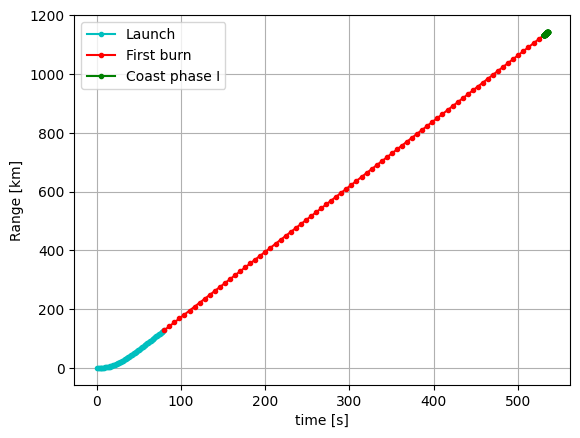

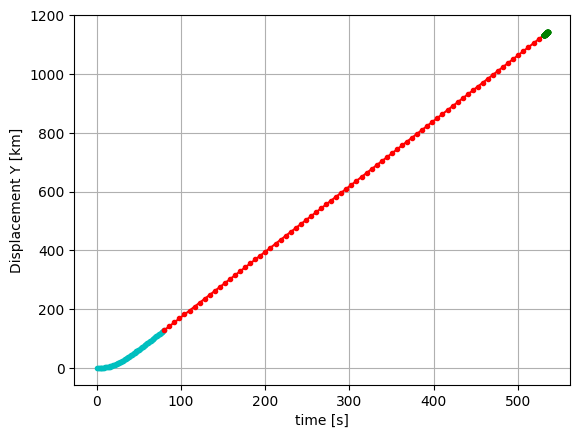

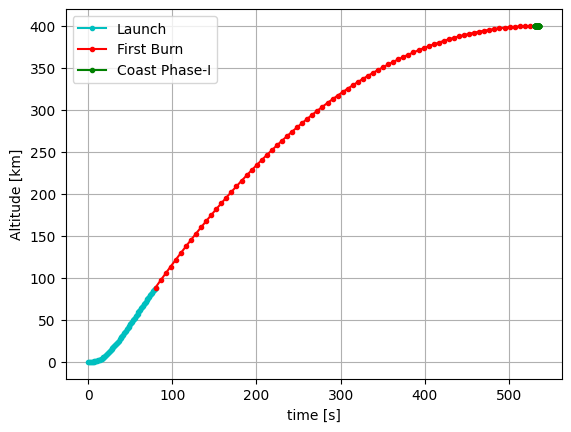

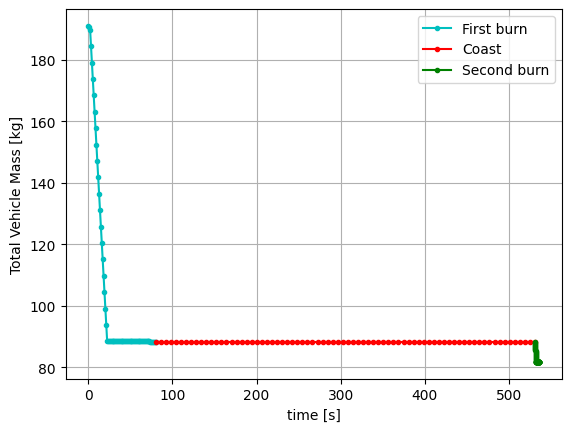

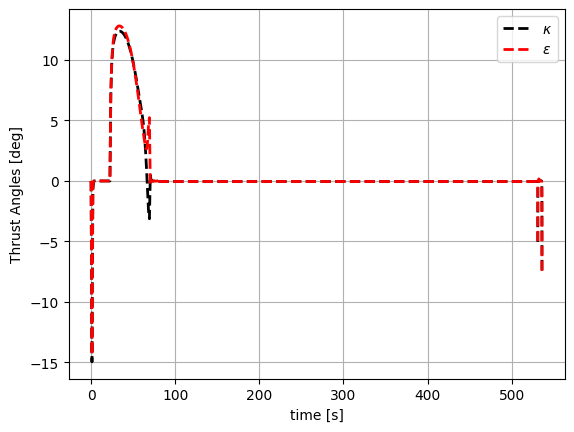

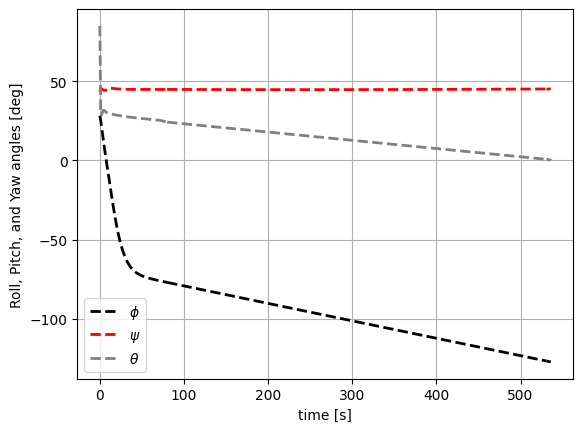

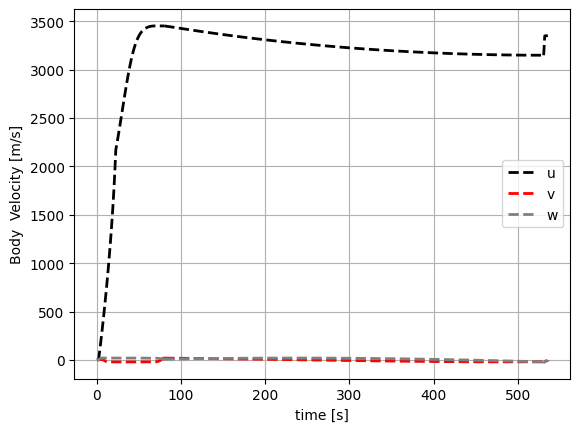

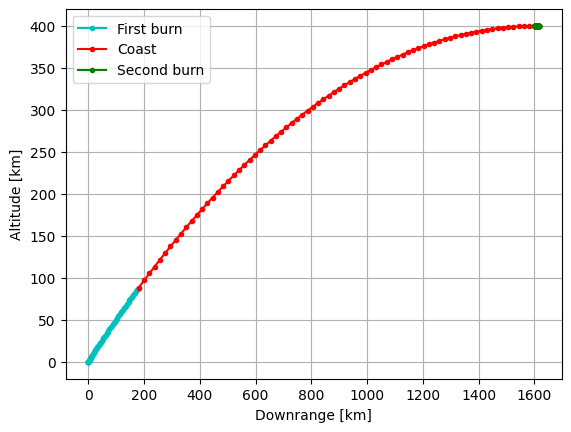

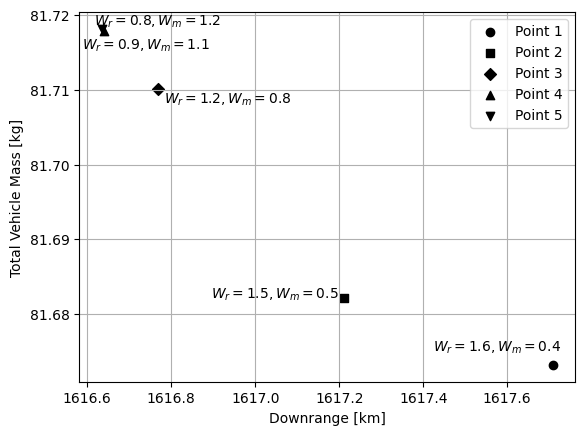

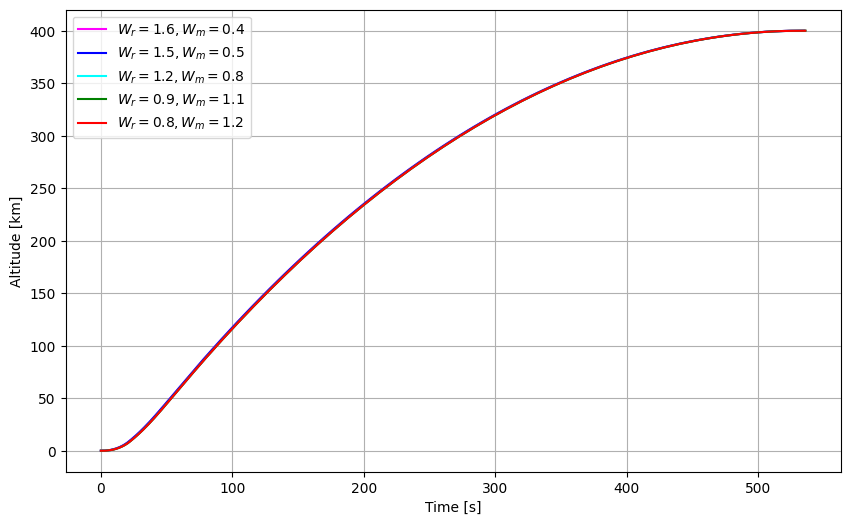

In [1]:
from pyomo.dae import ContinuousSet, DerivativeVar, Integral
from pyomo.environ import ConcreteModel, TransformationFactory, Var, \
                          NonNegativeReals, Constraint, ConstraintList, \
                          SolverFactory, Objective, cos, sin, tan, minimize, maximize,  \
                          NonNegativeReals, NegativeReals, Param, sqrt 
from pyomo.environ import *
from pyomo.dae import *
from math import isclose
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import logging
import matplotlib.pyplot as plt
from MAV import MAV
import Parameters as param
from Utilities.VarContainer import VarContainer
from Utilities.Plotter import plotResults
from Utilities.saveOptimizationVariables import saveOptimizationVariables
from Utilities.loadOptimizationVariables import loadOptimizationVariables
from pyomo.environ import Suffix, ConcreteModel, Var, NonNegativeReals, \
    Constraint, Objective, SolverFactory
from pyomo.util.infeasible import (
    find_infeasible_constraints,
    log_infeasible_constraints,
    find_infeasible_bounds,
    log_infeasible_bounds,
    find_close_to_bounds,
    log_close_to_bounds,
)

# Set up logging
logging.basicConfig(level=logging.INFO)  # Ensure logging level is INFO or DEBUG
logger = logging.getLogger('pyomo.core')

def main():
    
    miu_mars = 4.282837e13
    mars_radius = 3.3895e3

    # Initial and final conditions
    x0 = None
    y0 = None
    z0 = None

    u0 = None
    v0 = None
    w0 = None

    phi0 = None
    the0 = None 
    psi0 = None

    p0 = None
    q0 = None
    r0 = None

    xf = None
    yf = None
    zf = None
    
    uf = None
    vf = None
    wf = None

    phif = None
    thef = None 
    psif = None
    
    pf = None
    qf = None
    rf = None

    # Initialize lists to store results
    final_mass_values = []
    final_downrange_values = []

    # Weightings 
    W_Obj1 = [0.4, 0.5, 0.8, 1.1, 1.2]
    W_Obj2 = [1.6, 1.5, 1.2, 0.9, 0.8] 

    for weight in range(5):
        for warm in range(1):

            # Create mav vehicle
            mav = MAV(x0=x0, y0=y0, z0=z0, u0=u0, v0=v0, w0=w0, phi0=phi0, the0=the0, psi0=psi0, p0=p0, q0=q0, r0=r0, \
                    xf=xf, yf=yf, zf=zf, uf=uf, vf=vf, wf=wf, phif=phif, thef=thef, psif=psif, pf=pf, qf=qf, rf=rf)
        
            # Boundary Conditions
            mav.m.BCs_con = ConstraintList(rule=mav.BCs)
            
            # Phase 1
            n1 = [1] # flag for Phase 1

            mav.m.Q_dmpdot_dtau_Con1         = Constraint(n1, mav.m.t1, rule=mav.Q_dmass_dtau)

            mav.m.Q_dx_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dx_dtau)
            mav.m.Q_dy_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dy_dtau)
            mav.m.Q_dz_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dz_dtau)

            mav.m.Q_du_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_du_dtau)
            mav.m.Q_dv_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dv_dtau)
            mav.m.Q_dw_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dw_dtau)

            mav.m.Q_dp_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dp_dtau)
            mav.m.Q_dq_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dq_dtau)
            mav.m.Q_dr_dtau_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_dr_dtau)

            mav.m.Q_dphi_dtau_Con1           = Constraint(n1, mav.m.t1, rule=mav.Q_dphi_dtau)
            mav.m.Q_dthe_dtau_Con1           = Constraint(n1, mav.m.t1, rule=mav.Q_dthe_dtau)
            mav.m.Q_dpsi_dtau_Con1           = Constraint(n1, mav.m.t1, rule=mav.Q_dpsi_dtau)

            mav.m.Q_massdot_Con1             = Constraint(n1, mav.m.t1, rule=mav.Q_massdot)

            mav.m.Q_q0_Con1                  = Constraint(n1, mav.m.t1, rule=mav.Q_q0)
            mav.m.Q_q1_Con1                  = Constraint(n1, mav.m.t1, rule=mav.Q_q1)
            mav.m.Q_q2_Con1                  = Constraint(n1, mav.m.t1, rule=mav.Q_q2)
            mav.m.Q_q3_Con1                  = Constraint(n1, mav.m.t1, rule=mav.Q_q3)

            mav.m.Q_pdot_Con1                = Constraint(n1, mav.m.t1, rule=mav.Q_pdot)
            mav.m.Q_qdot_Con1                = Constraint(n1, mav.m.t1, rule=mav.Q_qdot)   
            mav.m.Q_rdot_Con1                = Constraint(n1, mav.m.t1, rule=mav.Q_rdot)

            mav.m.Q_udot_Con1                = Constraint(n1, mav.m.t1, rule=mav.Q_udot)
            mav.m.Q_vdot_Con1                = Constraint(n1, mav.m.t1, rule=mav.Q_vdot)   
            mav.m.Q_wdot_Con1                = Constraint(n1, mav.m.t1, rule=mav.Q_wdot)

            mav.m.Q_phidot_Con1              = Constraint(n1, mav.m.t1, rule=mav.Q_phidot)
            mav.m.Q_thedot_Con1              = Constraint(n1, mav.m.t1, rule=mav.Q_thedot)
            mav.m.Q_psidot_Con1              = Constraint(n1, mav.m.t1, rule=mav.Q_psidot)

            mav.m.Q_u1_Con1                  = Constraint(n1, mav.m.t1, rule=mav.Q_u)
            mav.m.Q_v1_Con1                  = Constraint(n1, mav.m.t1, rule=mav.Q_v)
            mav.m.Q_w1_Con1                  = Constraint(n1, mav.m.t1, rule=mav.Q_w)

            # Phase 2
            n2 = [2] # flag for Phase 2

            mav.m.Q_dmpdot_dtau_Con2         = Constraint(n2, mav.m.t2, rule=mav.Q_dmass_dtau)

            mav.m.Q_massdot2_Con2            = Constraint(n2, mav.m.t2, rule=mav.Q_mass_dot_2)

            mav.m.Q_dx_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dx_dtau)
            mav.m.Q_dy_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dy_dtau)
            mav.m.Q_dz_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dz_dtau)

            mav.m.Q_du_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_du_dtau)
            mav.m.Q_dv_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dv_dtau)
            mav.m.Q_dw_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dw_dtau)

            mav.m.Q_dp_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dp_dtau)
            mav.m.Q_dq_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dq_dtau)
            mav.m.Q_dr_dtau_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_dr_dtau)

            mav.m.Q_dphi_dtau_Con2           = Constraint(n2, mav.m.t2, rule=mav.Q_dphi_dtau)
            mav.m.Q_dthe_dtau_Con2           = Constraint(n2, mav.m.t2, rule=mav.Q_dthe_dtau)
            mav.m.Q_dpsi_dtau_Con2           = Constraint(n2, mav.m.t2, rule=mav.Q_dpsi_dtau)

            mav.m.Q_massdot_Con2             = Constraint(n2, mav.m.t2, rule=mav.Q_massdot)

            mav.m.Q_q0_Con2                  = Constraint(n2, mav.m.t2, rule=mav.Q_q0)
            mav.m.Q_q1_Con2                  = Constraint(n2, mav.m.t2, rule=mav.Q_q1)
            mav.m.Q_q2_Con2                  = Constraint(n2, mav.m.t2, rule=mav.Q_q2)
            mav.m.Q_q3_Con2                  = Constraint(n2, mav.m.t2, rule=mav.Q_q3)

            mav.m.Q_pdot_Con2                = Constraint(n2, mav.m.t2, rule=mav.Q_pdot)
            mav.m.Q_qdot_Con2                = Constraint(n2, mav.m.t2, rule=mav.Q_qdot_2)   
            mav.m.Q_rdot_Con2                = Constraint(n2, mav.m.t2, rule=mav.Q_rdot_2)
            
            mav.m.Q_udot_Con2                = Constraint(n2, mav.m.t2, rule=mav.Q_udot_2)
            mav.m.Q_vdot_Con2                = Constraint(n2, mav.m.t2, rule=mav.Q_vdot_2)   
            mav.m.Q_wdot_Con2                = Constraint(n2, mav.m.t2, rule=mav.Q_wdot_2)

            mav.m.Q_phidot_Con2              = Constraint(n2, mav.m.t2, rule=mav.Q_phidot)
            mav.m.Q_thedot_Con2              = Constraint(n2, mav.m.t2, rule=mav.Q_thedot)
            mav.m.Q_psidot_Con2              = Constraint(n2, mav.m.t2, rule=mav.Q_psidot)

            mav.m.Q_u1_Con2                  = Constraint(n2, mav.m.t2, rule=mav.Q_u)
            mav.m.Q_v1_Con2                  = Constraint(n2, mav.m.t2, rule=mav.Q_v)
            mav.m.Q_w1_Con2                  = Constraint(n2, mav.m.t2, rule=mav.Q_w)

            # Phase 3
            n3 = [3] # flag for Phase 3

            mav.m.Q_dmpdot_dtau_Con3         = Constraint(n3, mav.m.t3, rule=mav.Q_dmass_dtau)

            mav.m.Q_dx_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dx_dtau)
            mav.m.Q_dy_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dy_dtau)
            mav.m.Q_dz_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dz_dtau)

            mav.m.Q_du_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_du_dtau)
            mav.m.Q_dv_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dv_dtau)
            mav.m.Q_dw_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dw_dtau)

            mav.m.Q_dp_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dp_dtau)
            mav.m.Q_dq_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dq_dtau)
            mav.m.Q_dr_dtau_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_dr_dtau)

            mav.m.Q_dphi_dtau_Con3           = Constraint(n3, mav.m.t3, rule=mav.Q_dphi_dtau)
            mav.m.Q_dthe_dtau_Con3           = Constraint(n3, mav.m.t3, rule=mav.Q_dthe_dtau)
            mav.m.Q_dpsi_dtau_Con3           = Constraint(n3, mav.m.t3, rule=mav.Q_dpsi_dtau)

            mav.m.Q_massdot_Con3             = Constraint(n3, mav.m.t3, rule=mav.Q_massdot)

            mav.m.Q_q0_Con3                  = Constraint(n3, mav.m.t3, rule=mav.Q_q0)
            mav.m.Q_q1_Con3                  = Constraint(n3, mav.m.t3, rule=mav.Q_q1)
            mav.m.Q_q2_Con3                  = Constraint(n3, mav.m.t3, rule=mav.Q_q2)
            mav.m.Q_q3_Con3                  = Constraint(n3, mav.m.t3, rule=mav.Q_q3)

            mav.m.Q_pdot_Con3                = Constraint(n3, mav.m.t3, rule=mav.Q_pdot)
            mav.m.Q_qdot_Con3                = Constraint(n3, mav.m.t3, rule=mav.Q_qdot)   
            mav.m.Q_rdot_Con3                = Constraint(n3, mav.m.t3, rule=mav.Q_rdot)
            
            mav.m.Q_udot_Con3                = Constraint(n3, mav.m.t3, rule=mav.Q_udot)
            mav.m.Q_vdot_Con3                = Constraint(n3, mav.m.t3, rule=mav.Q_vdot)   
            mav.m.Q_wdot_Con3                = Constraint(n3, mav.m.t3, rule=mav.Q_wdot)

            mav.m.Q_phidot_Con3              = Constraint(n3, mav.m.t3, rule=mav.Q_phidot)
            mav.m.Q_thedot_Con3              = Constraint(n3, mav.m.t3, rule=mav.Q_thedot)
            mav.m.Q_psidot_Con3              = Constraint(n3, mav.m.t3, rule=mav.Q_psidot)

            mav.m.Q_u1_Con3                  = Constraint(n3, mav.m.t3, rule=mav.Q_u)
            mav.m.Q_v1_Con3                  = Constraint(n3, mav.m.t3, rule=mav.Q_v)
            mav.m.Q_w1_Con3                  = Constraint(n3, mav.m.t3, rule=mav.Q_w)

            # Define Objective
            mav.m.range = mav.m.x_3[1] + mav.m.y_3[1]
            mav.m.mass = mav.m.mass_3[1]
            mav.m.objective = Objective(expr=(((mav.m.mass**W_Obj1[weight]) * (mav.m.range**W_Obj2[weight]))), sense=maximize)

            # Warm start initial guess from previous solution
            # if warm > 0:
            #     loadOptimizationVariables(mav, myPyomoVars)

            # Dsicretized size description
            from pyomo.util.model_size import build_model_size_report
            report = build_model_size_report(mav.m)
            print("Num constraints: ", report.activated.constraints)
            print("Num variables: ", report.activated.variables)

            # Solve
            solver = SolverFactory('ipopt')
            solver.options["halt_on_ampl_error"] = "yes"
            solver.options['tol'] = 1e-6 
            solver.options['dual_inf_tol'] = 1e-6
            solver.options['constr_viol_tol'] = 1e-6
            solver.options["max_iter"] = 800
            solver.options["linear_scaling_on_demand"] = "yes"
            solver.options['nlp_scaling_method'] = 'gradient-based'
            solver.options['linear_solver'] = "ma27"
            results = solver.solve(mav.m, tee=True, keepfiles=True, logfile="log_check.log")

            # Save all data for next warm start
            # if warm == 0:
            #     _,myPyomoVars = saveOptimizationVariables(mav)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

            # Retrieve and store final values for Pareto plot
            if warm == 0:
                final_mass_values.append(value(mav.m.mass_3[1] * mav.m.mass_scale))
                final_downrange_values.append(np.sqrt(value(mav.m.x_3[1] * mav.m.x_scale)**2 + value(mav.m.y_3[1] * mav.m.y_scale)**2) / 1e3)

        # Plot graphs for desired weight
        trajectory_vars = VarContainer(mav.m)
        if weight == 2 :
            plotResults(trajectory_vars, mav.m)

        results_t1 = []
        results_t2 = []
        results_t3 = []
        results_list = []

        for t1 in mav.m.t1:
            results_t1.append({
                't': t1 * value(mav.m.tf1),
                'x': value(mav.m.x_1[t1] * mav.m.x_scale),
                'y': value(mav.m.y_1[t1] * mav.m.y_scale),
                'downrange': sqrt(value(mav.m.x_1[t1] * mav.m.x_scale)**2 + value(mav.m.y_1[t1] * mav.m.y_scale)**2),
                'altitude': value(mav.m.z_1[t1] * mav.m.z_scale),
            })

        for t2 in mav.m.t2:
            results_t2.append({
                't': t2 * value(mav.m.tf2) + mav.m.tf1(),
                'x': value(mav.m.x_2[t2] * mav.m.x_scale),
                'y': value(mav.m.y_2[t2] * mav.m.y_scale),
                'downrange': sqrt(value(mav.m.x_2[t2] * mav.m.x_scale)**2 + value(mav.m.y_2[t2] * mav.m.y_scale)**2),
                'altitude': value(mav.m.z_2[t2] * mav.m.z_scale),
            })

        for t3 in mav.m.t3:
            results_t3.append({
                't': t3 * value(mav.m.tf3) + mav.m.tf1() + mav.m.tf2(),
                'x': value(mav.m.x_3[t3] * mav.m.x_scale),
                'y': value(mav.m.y_3[t3] * mav.m.y_scale),
                'downrange': sqrt(value(mav.m.x_3[t3] * mav.m.x_scale)**2 + value(mav.m.y_3[t3] * mav.m.y_scale)**2),
                'altitude': value(mav.m.z_3[t3] * mav.m.z_scale),
            })

        results_list = results_t1 + results_t2 + results_t3

        def export_to_csv(results_list, filename):
            keys = results_list[0].keys()  
            with open(filename, 'w', newline='') as output_file:
                dict_writer = csv.DictWriter(output_file, fieldnames=keys)
                dict_writer.writeheader()
                dict_writer.writerows(results_list)
        export_to_csv(results_list, f'results_{weight}.csv')

    plt.show()  

    labels = [f'$W_r={w2},W_m={w1}$' for w1, w2 in zip(W_Obj1, W_Obj2)]

    # Plot Pareto Front
    plt.figure()
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']
    for i in range(len(final_mass_values)):
        plt.scatter(final_downrange_values[i], final_mass_values[i], marker=markers[i % len(markers)], color='black', label=f'Point {i+1}')
        if i == 0:
            plt.annotate(labels[i % len(labels)], (final_downrange_values[i], final_mass_values[i]), textcoords="offset points", xytext=(-40, 10), ha='center')
        elif i == 1:
            plt.annotate(labels[i % len(labels)], (final_downrange_values[i], final_mass_values[i]), textcoords="offset points", xytext=(-50, 0), ha='center')
        elif i == 2:
            plt.annotate(labels[i % len(labels)], (final_downrange_values[i], final_mass_values[i]), textcoords="offset points", xytext=(50, -10), ha='center')
        elif i == 3:
            plt.annotate(labels[i % len(labels)], (final_downrange_values[i], final_mass_values[i]), textcoords="offset points", xytext=(30, -13), ha='center')
        elif i == 4:
            plt.annotate(labels[i % len(labels)], (final_downrange_values[i], final_mass_values[i]), textcoords="offset points", xytext=(40, 3), ha='center')
    plt.xlabel('Downrange [km]')
    plt.ylabel('Total Vehicle Mass [kg]')
    plt.legend()
    plt.grid(True)
    plt.show()        
    
    # Plot optimal trajectory histories
    file_paths = [f'results_{i}.csv' for i in range(len(W_Obj1))]
    dfs = [pd.read_csv(file) for file in file_paths]
    colors = ['magenta', 'blue', 'cyan', 'green', 'red']

    fig2d, ax2d = plt.subplots(figsize=(10, 6))
    for df, label, color in zip(dfs, labels, colors):
        ax2d.plot(df['t'], df['altitude'] / 1000, label=label, color=color)
    ax2d.set_xlabel('Time [s]')
    ax2d.set_ylabel('Altitude [km]')
    ax2d.legend()
    ax2d.grid(True)
    plt.show()

    # Delete the result files
    for file_path in file_paths:
        if os.path.exists(file_path):
            os.remove(file_path)

    return mav.m

if __name__ == '__main__':
    m = main()